# Linear Regression | Mathematical Apply | Data Analysis | Create Custom Algorithms

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#handle warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
data= pd.read_csv('/kaggle/input/simple-lr-data/placement (3).csv')

In [4]:
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
data.isna().sum()[data.isna().sum() > 0]

Series([], dtype: int64)

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [8]:
data.sample(5)

,cgpa,package
16,6.84,2.35
170,6.22,2.87
35,6.87,2.87
2,7.82,3.25
3,7.42,3.67


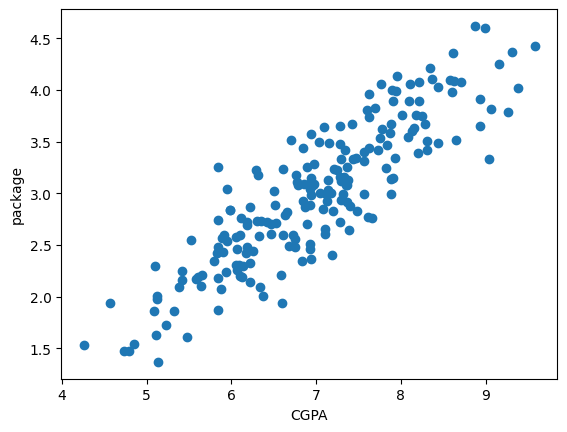

In [9]:
#EDA
plt.scatter(data['cgpa'], data['package'])
plt.xlabel('CGPA')
plt.ylabel('package')
plt.show()

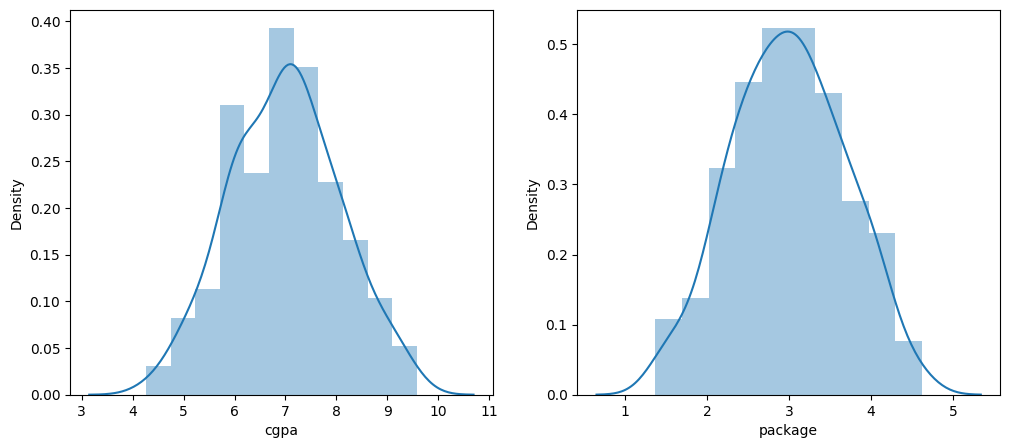

In [10]:
#EDA

plt.figure(figsize= (12, 5))
plt.subplot(1,2,1)
sns.distplot(data['cgpa'])

plt.subplot(1,2,2)
sns.distplot(data['package'])

plt.show()

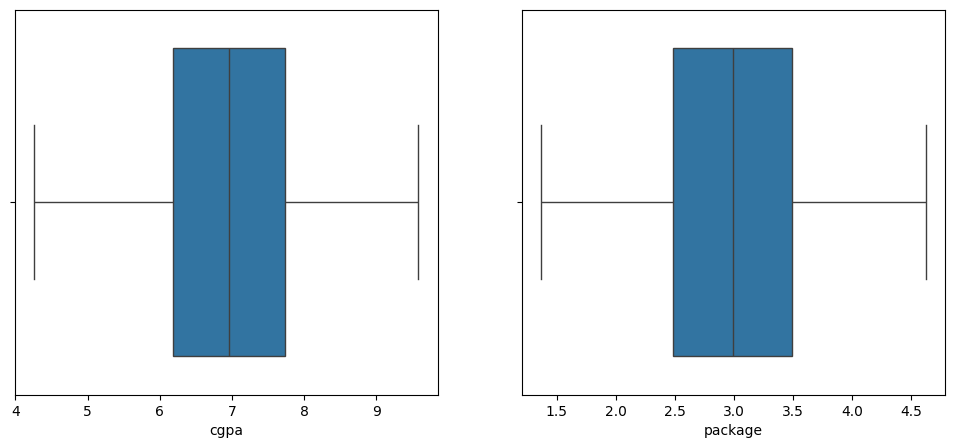

In [11]:
#EDA

plt.figure(figsize= (12, 5))
plt.subplot(1,2,1)
sns.boxplot(x= data['cgpa'])

plt.subplot(1,2,2)
sns.boxplot(x= data['package'])

plt.show()

In [12]:
X= data.iloc[:, 0:1]
y= data.iloc[:, -1]

In [13]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 2)

In [14]:
X_train.shape

(160, 1)

In [15]:
#sklearn class use on linearRegression

lr= LinearRegression()
lr.fit(X_train, y_train)

y_pred= lr.predict(X_test)
print('R2-Score:', r2_score(y_test, y_pred))

R2-Score: 0.780730147510384


In [16]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(lr,X,y, cv= 15, scoring= 'r2'))

np.float64(0.7135743884667137)

Text(0, 0.5, 'package')

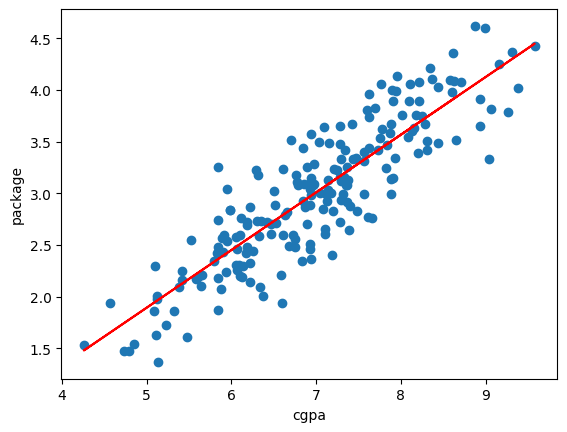

In [17]:
plt.scatter(data['cgpa'], data['package'])
plt.plot(X_train, lr.predict(X_train), color= 'red')
plt.xlabel('cgpa')
plt.ylabel('package')

In [18]:
class MyLr:
    def __init__(self):
        self.m= None
        self.b= None

    def fit(self,X_train, y_train):
        num= 0
        den= 0

        for i in range(X_train.shape[0]):

            num= num + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
            den= den + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))

        self.m= num/den
        self.b= y_train.mean() - (self.m * X_train.mean())

        print(self.m)
        print(self.b)

    def predict(self, X_test):

        print(X_test)
        return self.m * X_test + self.b
        

In [20]:
#use custom create algorithms

# lr2= MyLr()
# lr2.fit(X_train, y_train)